Naive Bayes Classifier

Descarga del archivo csv a trabajar

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gonzalomajlis
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment


100%|██████████| 84.1k/84.1k [00:00<00:00, 26.5MB/s]

In [ ]:
import pandas as pd
df = pd.read_csv('/content/air-quality-and-pollution-assessment/updated_pollution_dataset.csv')
df = df.rename(columns={'Air Quality': 'air_quality'})
#print(df.head())
print(df.columns)

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'air_quality'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()

#df2 = pd.get_dummies(df, columns=['air_quality'])
#print(df2.head())
y = df[['air_quality']]
data_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
#X = df[data_features].copy()
X = df.copy()
X.drop('air_quality', axis=1, inplace=True)
#print(X.head())


trainValidX, test_X, trainValidY, test_y = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0)
train_X, valid_X, train_y, valid_y = train_test_split(trainValidX, trainValidY, train_size=0.8, test_size=0.2, random_state=0)
print(train_y.head())

     air_quality
448         Good
3231        Good
1641        Good
3722        Good
239         Poor


In [ ]:
train_y = ord_encoder.fit_transform(train_y[['air_quality']])
valid_y = ord_encoder.transform(valid_y[['air_quality']])
test_y = ord_encoder.transform(test_y[['air_quality']])
print(train_y)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [2.]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
from sklearn.metrics import classification_report
y_pred = gnb.predict(valid_X)
classification_report(valid_y, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.99      0.99       353\n         1.0       0.83      0.77      0.80        90\n         2.0       0.95      0.95      0.95       278\n         3.0       0.82      0.85      0.84       179\n\n    accuracy                           0.93       900\n   macro avg       0.90      0.89      0.89       900\nweighted avg       0.93      0.93      0.93       900\n'

In [ ]:
gnb.score(test_X, test_y)

0.924

In [ ]:
from sklearn.metrics import mean_absolute_error
pred_test = gnb.predict(test_X)
mae = mean_absolute_error(test_y, pred_test)
print(mae)

0.124


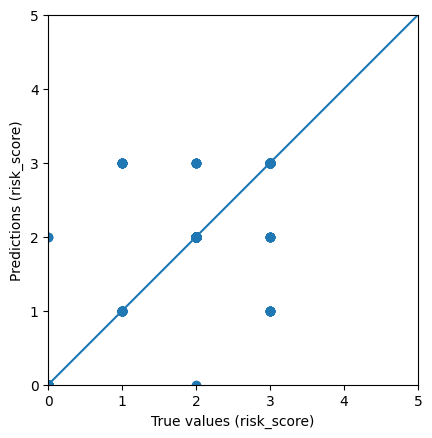

In [ ]:
import matplotlib.pyplot as plt

a = plt.axes(aspect='equal')
plt.scatter(test_y, pred_test)
plt.xlabel('True values (risk_score)')
plt.ylabel('Predictions (risk_score)')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)